Pattern: ('getelementptr <- phi',), Count: 222
Pattern: ('srem <- call',), Count: 111
Pattern: ('getelementptr <- alloca',), Count: 111
Pattern: ('store <- srem',), Count: 111
Pattern: ('store <- getelementptr',), Count: 111
Pattern: ('add <- phi',), Count: 111
Pattern: ('icmp <- add',), Count: 111
Pattern: ('srem <- call', 'getelementptr <- alloca'), Count: 111
Pattern: ('getelementptr <- alloca', 'getelementptr <- phi'), Count: 111
Pattern: ('getelementptr <- phi', 'getelementptr <- phi'), Count: 111


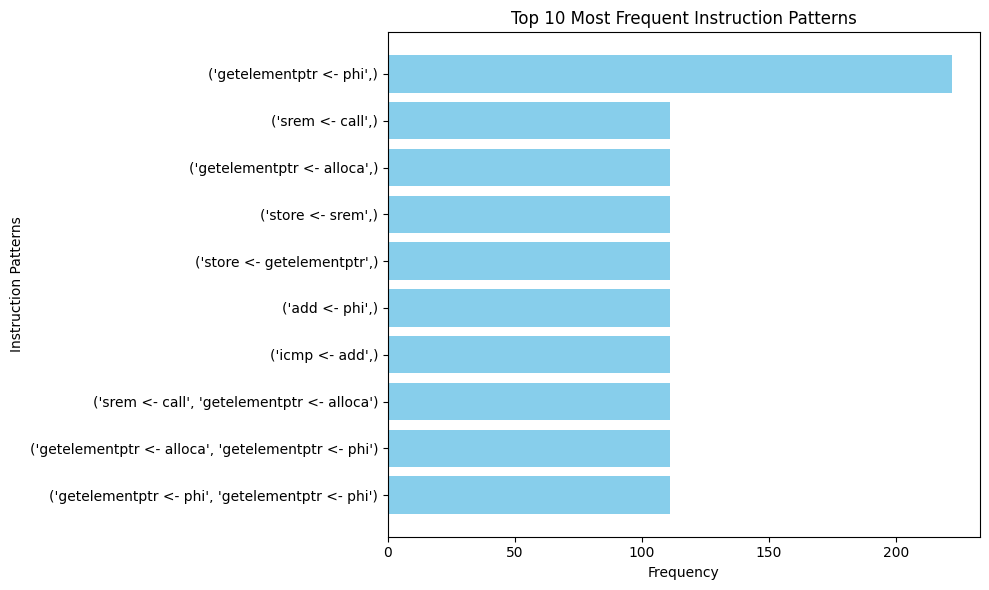

In [1]:
from collections import Counter
import matplotlib.pyplot as plt

with open("log.txt", "r") as f:
    trace = [line.strip() for line in f]

def create_patterns(trace, window_size):
    patterns = []
    for i in range(len(trace) - window_size + 1):
        pattern = tuple(trace[i:i+window_size])
        patterns.append(pattern)
    return patterns

all_patterns = []
for window_size in range(1, 6):
    all_patterns.extend(create_patterns(trace, window_size))


pattern_counts = Counter(all_patterns)
top_patterns = pattern_counts.most_common(10)
for pattern, count in top_patterns:
    print(f"Pattern: {pattern}, Count: {count}")


patterns = [str(pattern) for pattern, _ in top_patterns]
counts = [count for _, count in top_patterns]


plt.figure(figsize=(10, 6))
plt.barh(patterns, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Instruction Patterns')
plt.title('Top 10 Most Frequent Instruction Patterns')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()